In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='Malgun Gothic' )
!pip install koreanize-matplotlib
from IPython.display import display
import koreanize_matplotlib
import seaborn as sns

In [160]:
origin_train=pd.read_csv("train.csv")
origin_test=pd.read_csv("test.csv")
data_train=origin_train.copy()
data_test=origin_test.copy()

In [161]:
data_train

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [162]:
data_test

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 1. 변수 살펴보기
- Date: 날짜
- Rented Bike Count: 빌린 자전거 (**종속변수**)
- Hour: 시간 
- Temperature(째C): 기온
- Humidity(%): 습도
- Wind speed (m/s): 풍속
- Visibility (10m): 가시거리
- Dew point temperature(째C): 이슬점 온도
- Solar Radiation (MJ/m2): 일조량
- Rainfall(mm): 강수량
- Snowfall (cm): 적설량
- Seasons: 계절
- Holiday: 공휴일 여부
- Functioning Day: 운영일 여부

In [163]:
data_train.describe()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [164]:
# 음수가 나오면 안 되는 변수들에서 음수 개수 확인
for col in [
    'Rented Bike Count',
    'Hour',
    'Temperature(째C)',
    'Humidity(%)',
    'Wind speed (m/s)',
    'Visibility (10m)',
    'Dew point temperature(째C)',
    'Solar Radiation (MJ/m2)',
    'Rainfall(mm)',
    'Snowfall (cm)'
]:
    # 각 변수에서 음수 값 개수 출력
    print(col, (data_train[col] < 0).sum())

Rented Bike Count 0
Hour 0
Temperature(째C) 1242
Humidity(%) 0
Wind speed (m/s) 0
Visibility (10m) 0
Dew point temperature(째C) 2803
Solar Radiation (MJ/m2) 0
Rainfall(mm) 0
Snowfall (cm) 0


현재 기온과 이슬점 온도만 0이하의 값을 가지고 있다는 것을 확인할 수 있었다. 이는 0 이하의 수치가 나올 수 있는 변수들이기 때문에 해당 조건에 대한 이상치는 없는 것으로 생각된다.

In [165]:
for col in [
    'Rented Bike Count',
    'Hour',
    'Temperature(째C)',
    'Humidity(%)',
    'Wind speed (m/s)',
    'Visibility (10m)',
    'Dew point temperature(째C)',
    'Solar Radiation (MJ/m2)',
    'Rainfall(mm)',
    'Snowfall (cm)'
]:
    # 각 변수에서 음수 값 개수 출력
    print(col, (data_train[col] == 0).sum())

Rented Bike Count 223
Hour 335
Temperature(째C) 17
Humidity(%) 17
Wind speed (m/s) 53
Visibility (10m) 0
Dew point temperature(째C) 45
Solar Radiation (MJ/m2) 3890
Rainfall(mm) 7529
Snowfall (cm) 7648


습도와 풍속의 경우 값으로 0이 나오기 어렵다. 따라서 습도와 풍속에서 0으로 기록된 이상치가 있다고 판단했다.

In [166]:
num_cols = data_train.select_dtypes(include='number') # 히트맵 그리기 위해 숫자형 변수만 선택
corr = num_cols.corr()

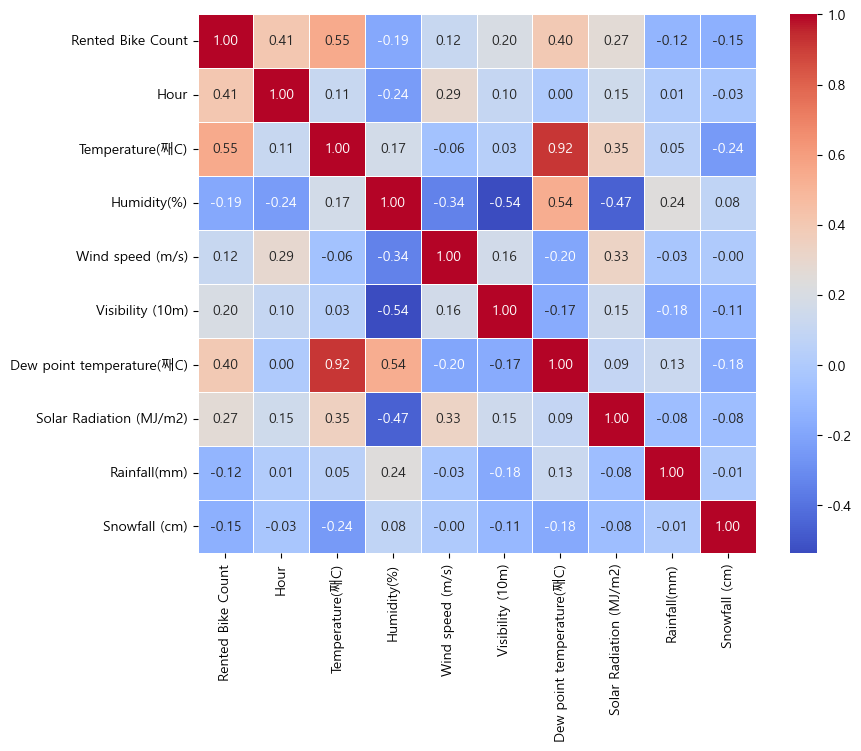

In [167]:
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5
)
plt.show()

히트맵을 보면 자전거 대여 수는 기온이랑 가장 큰 상관관계를 보였고 그다음으로 시간대, 이슬점 온도 순으로 상관계수가 컸다.
세 변수는 대여 수와 중간 정도의 상관관계를 보이는 반면, 나머지 기상 변수들은 전반적으로 상관계수가 크지 않아 특정한 관계를 보인다고 하기는 어려워 보인다.

특히 기온이랑 이슬점 온도는 서로 상관관계가 매우 높아서, 두 변수가 비슷한 정보를 담고 있다는 점도 확인할 수 있었다. -> 다중공선성을 고려해야 할 것으로 보인다.
가시거리와 습도, 일조량과 습도 역시 중간정도의 음의 상관관계를 가지는 것을 보인다.

# 기상청 데이터를 이용해 결측치 채우기
 * https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
 * https://www.weather.go.kr/w/resources/pdf/kma_data_portal_guide.pdf
 * 일단 이 데이터로 결측치를 채우기 적절한지 판단하기 위해 2가지 정도 생각해볼 수 있다.
   1. 결측치를 제외한 나머지 값들이 모두 동일한가?
   2. 결측치 부분에 적절한 값이 들어가 있는가?
   

# **기온 결측치 채우기**
![설명](이슬점공식.png)

- Dewpoint = 이슬점
- T = 기온
- RH = humidity

In [168]:
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [169]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [170]:
data_train.isnull().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

결측치 확인
기온, 풍속, 계절에 결측치 있는 것으로 보임
기상청 데이터에서 날짜별 습도와 이슬점 온도를 비교해 동일할 경우 결측치 대체할 것임

## 습도롸 이슬점 비교 후 기온과 풍속 결측치 처리

In [171]:
# 혹시 잘못 덮어써도 되돌리기 위해 백업
data_train_before = data_train.copy()

In [172]:
real_data=pd.read_csv("C:/Users/jangs/Downloads/OBS_ASOS_TIM_20260203134504.csv", encoding='euc-kr')
real=real_data.copy()
real.head()

,지점,지점명,일시,기온(°C),풍속(m/s),습도(%),이슬점온도(°C)
0,108,서울,2017-12-01 00:00,-5.2,2.2,37,-17.6
1,108,서울,2017-12-01 01:00,-5.5,0.8,38,-17.6
2,108,서울,2017-12-01 02:00,-6.0,1.0,39,-17.7
3,108,서울,2017-12-01 03:00,-6.2,0.9,40,-17.6
4,108,서울,2017-12-01 04:00,-6.0,2.3,36,-18.6


In [173]:
real.isna().sum()

지점            0
지점명           0
일시            0
기온(°C)        1
풍속(m/s)      24
습도(%)         0
이슬점온도(°C)     0
dtype: int64

모든 데이터가 있을 것으로 보였으나 기상청 데이터 역시 일부 자료에서 기온과 풍속이 누락되어있다는 것을 확인함
우선 나머지 데이터 값이 동일한지 확인 후 기상청 데이터의 결측치 처리 여부에 대해 고민해보겠음

In [174]:
print(real[real['기온(°C)'].isna()])
print(real[real['풍속(m/s)'].isna()])

       지점 지점명                일시  기온(°C)  풍속(m/s)  습도(%)  이슬점온도(°C)
8730  108  서울  2018-11-29 18:00     NaN      0.9     46       -4.8
      지점 지점명                일시  기온(°C)  풍속(m/s)  습도(%)  이슬점온도(°C)
107  108  서울  2017-12-05 11:00    -3.9      NaN     25      -21.0
108  108  서울  2017-12-05 12:00    -2.3      NaN     25      -19.7
109  108  서울  2017-12-05 13:00    -1.6      NaN     27      -18.2
110  108  서울  2017-12-05 14:00    -1.1      NaN     28      -17.3
111  108  서울  2017-12-05 15:00    -0.7      NaN     28      -16.9
112  108  서울  2017-12-05 16:00    -0.5      NaN     30      -16.0
113  108  서울  2017-12-05 17:00    -1.6      NaN     35      -15.1
114  108  서울  2017-12-05 18:00    -2.6      NaN     40      -14.4
115  108  서울  2017-12-05 19:00    -3.2      NaN     45      -13.5
116  108  서울  2017-12-05 20:00    -3.5      NaN     46      -13.4
117  108  서울  2017-12-05 21:00    -3.7      NaN     47      -13.3
118  108  서울  2017-12-05 22:00    -2.8      NaN     49      -12.0
119  108

In [175]:
data_train['dt'] = (
    pd.to_datetime(data_train['Date'], dayfirst=True)
    + pd.to_timedelta(data_train['Hour'], unit='h')
)
data_train[['Date','Hour','dt']].head()

,Date,Hour,dt
0,01/12/2017,0,2017-12-01 00:00:00
1,01/12/2017,1,2017-12-01 01:00:00
2,01/12/2017,2,2017-12-01 02:00:00
3,01/12/2017,3,2017-12-01 03:00:00
4,01/12/2017,4,2017-12-01 04:00:00


date와 hour를 통합해 dt 변수 생성 후 잘 되었는지 확인함 

In [176]:
real['dt'] = pd.to_datetime(real['일시'])
real[['일시','dt']].head()

,일시,dt
0,2017-12-01 00:00,2017-12-01 00:00:00
1,2017-12-01 01:00,2017-12-01 01:00:00
2,2017-12-01 02:00,2017-12-01 02:00:00
3,2017-12-01 03:00,2017-12-01 03:00:00
4,2017-12-01 04:00,2017-12-01 04:00:00


dt 칼럼 생성해 merge하기 더 쉽게 하였음

In [177]:
train_sub = data_train[['dt','Humidity(%)','Dew point temperature(째C)','Temperature(째C)','Wind speed (m/s)']].copy()

real_sub = real[['dt','습도(%)','이슬점온도(°C)','기온(°C)','풍속(m/s)']].copy().rename(columns={
    '습도(%)': 'Humidity(%)_real',
    '이슬점온도(°C)': 'Dew point temperature(°C)_real',
    '기온(°C)': 'Temperature(°C)_real',
    '풍속(m/s)': 'Wind speed (m/s)_real'
})

merged = train_sub.merge(real_sub, on='dt', how='left')
merged.head()

,dt,Humidity(%),Dew point temperature(째C),Temperature(째C),Wind speed (m/s),Humidity(%)_real,Dew point temperature(°C)_real,Temperature(°C)_real,Wind speed (m/s)_real
0,2017-12-01 00:00:00,37,-17.6,-5.2,2.2,37,-17.6,-5.2,2.2
1,2017-12-01 01:00:00,38,-17.6,-5.5,0.8,38,-17.6,-5.5,0.8
2,2017-12-01 02:00:00,39,-17.7,-6.0,1.0,39,-17.7,-6.0,1.0
3,2017-12-01 03:00:00,40,-17.6,-6.2,0.9,40,-17.6,-6.2,0.9
4,2017-12-01 04:00:00,36,-18.6,-6.0,NaN,36,-18.6,-6.0,2.3


In [178]:
# 비교 가능한 행만 (둘 다 NaN 아닌 곳)
valid = merged.dropna(subset=[
    'Humidity(%)','Humidity(%)_real',
    'Dew point temperature(째C)','Dew point temperature(°C)_real'
]).copy()

# 완전 일치 여부
same_mask = (
    (valid['Humidity(%)'] == valid['Humidity(%)_real']) &
    (valid['Dew point temperature(째C)'] == valid['Dew point temperature(°C)_real'])
)

print("정확 일치율:", same_mask.mean())

정확 일치율: 0.9966417910447761


99.7%의 일치율을 보이는 것으로 보아 real 데이터의 일부를 data_train에 덮어씌워도 될 것으로 보인다.

In [179]:
# 불일치 확인해보기
diff = valid.loc[~same_mask, [
    'dt',
    'Humidity(%)','Humidity(%)_real',
    'Dew point temperature(째C)','Dew point temperature(°C)_real'
]].copy()

diff

,dt,Humidity(%),Humidity(%)_real,Dew point temperature(째C),Dew point temperature(°C)_real
4063,2018-05-19 07:00:00,0,63,4.5,4.5
4106,2018-05-21 02:00:00,0,33,-2.1,-2.1
4107,2018-05-21 03:00:00,0,34,-2.5,-2.5
4108,2018-05-21 04:00:00,0,33,-3.4,-3.4
4109,2018-05-21 05:00:00,0,36,-2.7,-2.7
4110,2018-05-21 06:00:00,0,39,-2.0,-2.0
4111,2018-05-21 07:00:00,0,35,-2.7,-2.7
4131,2018-05-22 03:00:00,0,72,10.4,10.4
4132,2018-05-22 04:00:00,0,72,10.5,10.5
4133,2018-05-22 05:00:00,0,72,10.6,10.6


In [180]:
print("불일치 행 개수:", len(diff))
print("불일치 중 train 습도=0인 비율:", (diff['Humidity(%)'] == 0).mean())
print("불일치 중 train 이슬점=0인 비율:", (diff['Dew point temperature(째C)'] == 0).mean())

# train이 0이고 real은 정상인 케이스만 따로 보기
bad_humidity0 = diff[(diff['Humidity(%)'] == 0) & (diff['Humidity(%)_real'] != 0)]
bad_humidity0

불일치 행 개수: 27
불일치 중 train 습도=0인 비율: 0.6296296296296297
불일치 중 train 이슬점=0인 비율: 0.37037037037037035


,dt,Humidity(%),Humidity(%)_real,Dew point temperature(째C),Dew point temperature(°C)_real
4063,2018-05-19 07:00:00,0,63,4.5,4.5
4106,2018-05-21 02:00:00,0,33,-2.1,-2.1
4107,2018-05-21 03:00:00,0,34,-2.5,-2.5
4108,2018-05-21 04:00:00,0,33,-3.4,-3.4
4109,2018-05-21 05:00:00,0,36,-2.7,-2.7
4110,2018-05-21 06:00:00,0,39,-2.0,-2.0
4111,2018-05-21 07:00:00,0,35,-2.7,-2.7
4131,2018-05-22 03:00:00,0,72,10.4,10.4
4132,2018-05-22 04:00:00,0,72,10.5,10.5
4133,2018-05-22 05:00:00,0,72,10.6,10.6


In [181]:
# 대체 전 0 개수
print("대체 전 train 습도 0 개수:", (merged['Humidity(%)'] == 0).sum())
print("대체 전 train 이슬점 0 개수:", (merged['Dew point temperature(째C)'] == 0).sum())

# 습도 0 -> real (real이 있을 때만)
mask_h0 = (merged['Humidity(%)'] == 0) & merged['Humidity(%)_real'].notna()
merged.loc[mask_h0, 'Humidity(%)'] = merged.loc[mask_h0, 'Humidity(%)_real']

# 이슬점 0 -> real (real이 있을 때만)
mask_d0 = (merged['Dew point temperature(째C)'] == 0) & merged['Dew point temperature(°C)_real'].notna()
merged.loc[mask_d0, 'Dew point temperature(째C)'] = merged.loc[mask_d0, 'Dew point temperature(°C)_real']

# 대체 후 0 개수
print("대체 후 train 습도 0 개수:", (merged['Humidity(%)'] == 0).sum())
print("대체 후 train 이슬점 0 개수:", (merged['Dew point temperature(째C)'] == 0).sum())
print("습도 교체한 행 수:", mask_h0.sum())
print("이슬점 교체한 행 수:", mask_d0.sum())

대체 전 train 습도 0 개수: 17
대체 전 train 이슬점 0 개수: 45
대체 후 train 습도 0 개수: 0
대체 후 train 이슬점 0 개수: 35
습도 교체한 행 수: 17
이슬점 교체한 행 수: 45


In [182]:
print("대체 전 train 기온 NaN:", merged['Temperature(째C)'].isna().sum())
print("대체 전 train 풍속 NaN:", merged['Wind speed (m/s)'].isna().sum())

mask_temp = merged['Temperature(째C)'].isna() & merged['Temperature(°C)_real'].notna()
merged.loc[mask_temp, 'Temperature(째C)'] = merged.loc[mask_temp, 'Temperature(°C)_real']

mask_wind = merged['Wind speed (m/s)'].isna() & merged['Wind speed (m/s)_real'].notna()
merged.loc[mask_wind, 'Wind speed (m/s)'] = merged.loc[mask_wind, 'Wind speed (m/s)_real']

print("대체 후 train 기온 NaN:", merged['Temperature(째C)'].isna().sum())
print("대체 후 train 풍속 NaN:", merged['Wind speed (m/s)'].isna().sum())
print("기온 교체한 행 수:", mask_temp.sum())
print("풍속 교체한 행 수:", mask_wind.sum())

대체 전 train 기온 NaN: 800
대체 전 train 풍속 NaN: 802
대체 후 train 기온 NaN: 0
대체 후 train 풍속 NaN: 2
기온 교체한 행 수: 800
풍속 교체한 행 수: 800


In [183]:
# 원본 data_train에 반영할 컬럼들
cols_to_update = ['Humidity(%)','Dew point temperature(째C)',
                  'Temperature(째C)','Wind speed (m/s)']

# merged에서 dt(시간키) + 수정된 컬럼만 추출
updated_part = merged[['dt'] + cols_to_update].copy()

# dt 기준으로 정렬 (같은 시간끼리 맞추기 위해)
data_train2 = data_train.set_index('dt')
updated_part2 = updated_part.set_index('dt')

# 값이 있는 경우에만 data_train에 덮어쓰기
data_train2.update(updated_part2)

# dt를 다시 컬럼으로 복구
data_train = data_train2.reset_index()

In [184]:
data_train.isna().sum()

dt                             0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)                0
Humidity(%)                    0
Wind speed (m/s)               2
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [185]:
# Wind speed 결측치가 있는 행 확인 (Date, Hour 기준)
data_train.loc[
    data_train['Wind speed (m/s)'].isna(),
    ['Date', 'Hour', 'Wind speed (m/s)']
]

,Date,Hour,Wind speed (m/s)
118,05/12/2017,22,NaN
129,06/12/2017,9,NaN


채우지 못한 나머지 풍속 데이터는 해당 데이터의 전날과 다음 날의 평균값으로 대체하려고 한다.

In [186]:
# Date를 datetime으로 변환 (날짜 비교용)
data_train['_date'] = pd.to_datetime(data_train['Date'], dayfirst=True, errors='coerce')

# Wind speed 결측치가 있는 행들에 대해 처리
for idx in data_train[data_train['Wind speed (m/s)'].isna()].index:
    
    # 현재 행의 날짜와 시간
    d = data_train.loc[idx, '_date']
    h = data_train.loc[idx, 'Hour']
    
    # 같은 날짜에서 바로 전/후 시간의 Wind speed 값 추출
    prev_val = data_train.loc[
        (data_train['_date'] == d) &
        (data_train['Hour'] == h - 1),
        'Wind speed (m/s)'
    ]
    
    next_val = data_train.loc[
        (data_train['_date'] == d) &
        (data_train['Hour'] == h + 1),
        'Wind speed (m/s)'
    ]
    
    # 전·후 값의 평균으로 결측치 대체 (둘 중 하나만 있어도 평균 계산)
    data_train.loc[idx, 'Wind speed (m/s)'] = np.nanmean([
        prev_val.values[0] if len(prev_val) > 0 else np.nan,
        next_val.values[0] if len(next_val) > 0 else np.nan
    ])

# 임시 컬럼 제거
data_train.drop(columns=['_date'], inplace=True)

# Wind speed 결측치가 남아있는지 최종 확인
data_train['Wind speed (m/s)'].isna().sum()

np.int64(0)

## 계절 결측치 채우기

In [187]:
# Date 컬럼을 datetime으로 변환 (월 정보 추출용)
date_dt = pd.to_datetime(data_train['Date'], dayfirst=True, errors='coerce')

# 월(month)만 따로 뽑기
month = date_dt.dt.month

# Seasons가 비어있는(NaN) 행만 선택
mask = data_train['Seasons'].isna()

# 결측치인 Seasons를 월 기준으로 채우기
data_train.loc[mask & month.isin([3,4,5]), 'Seasons'] = 'Spring'   # 3~5월 → 봄
data_train.loc[mask & month.isin([6,7,8]), 'Seasons'] = 'Summer'   # 6~8월 → 여름
data_train.loc[mask & month.isin([9,10,11]), 'Seasons'] = 'Autumn' # 9~11월 → 가을
data_train.loc[mask & month.isin([12,1,2]), 'Seasons'] = 'Winter'  # 12~2월 → 겨울

# Seasons 결측치가 남아있는지 확인
data_train['Seasons'].isna().sum()

np.int64(0)

In [189]:
data_train.isnull().sum()

dt                           0
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

결측치 처리 완료. 처리한 결측치를 바탕으로 해 전체 변수들의 특징을 대략적으로 파악해보겠음.

## Temperature

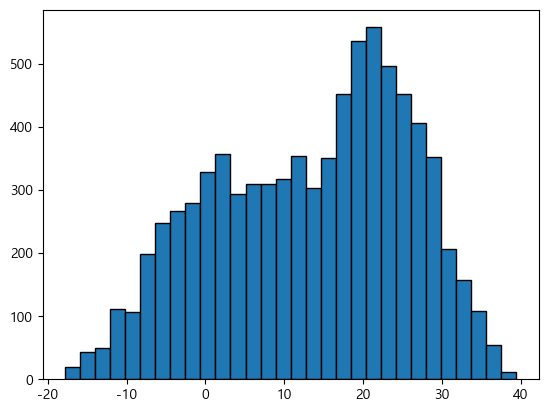

In [197]:
plt.hist(data_train['Temperature(째C)'], bins=30, edgecolor='black')
plt.show()

<Axes: xlabel='Seasons', ylabel='Temperature(째C)'>

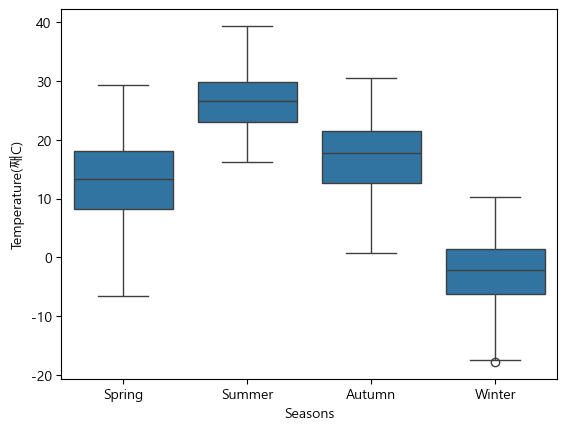

In [194]:
sns.boxplot(
    x='Seasons',
    y='Temperature(째C)',
    data=data_train,
    order=['Spring', 'Summer', 'Autumn', 'Winter']
)

분포를 확인해보았을 때 특별히 이상한 값은 찾아볼 수 없었다. 모두 정상적인 수치인 것으로 판단된다.

## Humidity

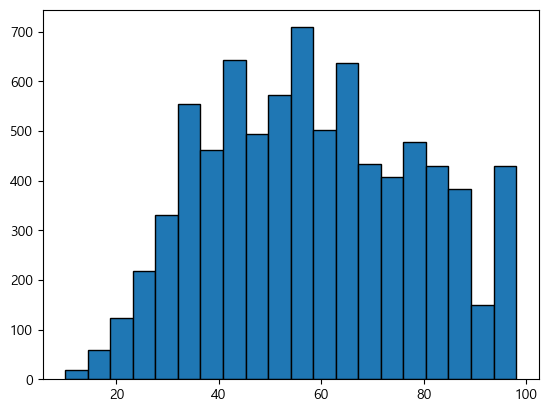

In [198]:
plt.hist(data_train['Humidity(%)'], bins=20, edgecolor='black')
plt.show()

<Axes: ylabel='Humidity(%)'>

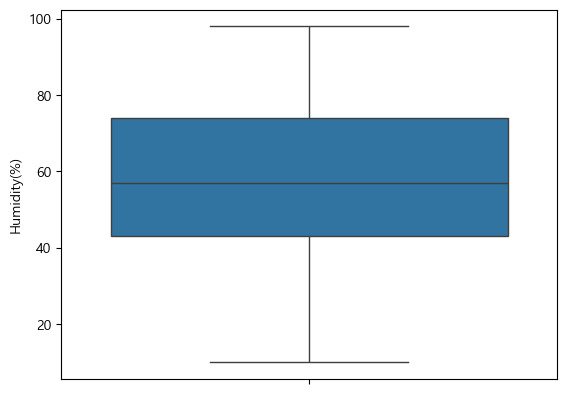

In [201]:
sns.boxplot(data_train['Humidity(%)'])

이 역시 앞선 결측치 제거로 큰 이상치는 없어보임을 확인할 수 있다.

## Wind speed

<Axes: xlabel='Seasons', ylabel='Wind speed (m/s)'>

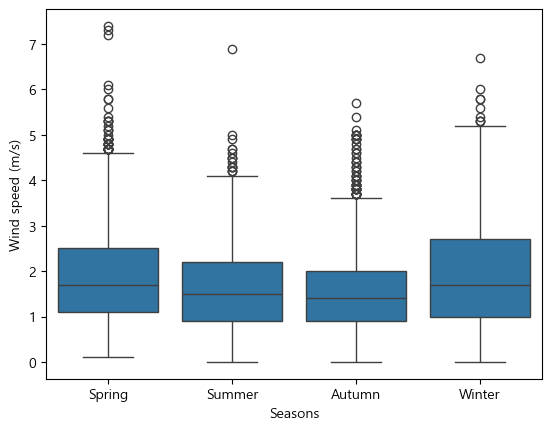

In [202]:
sns.boxplot(
    x='Seasons',
    y='Wind speed (m/s)',
    data=data_train,
    order=['Spring', 'Summer', 'Autumn', 'Winter']
)

In [ ]:
이상치가 많아 보이지만, 풍속의 경우 가능한 경우도 있을 것이며, 이는 실제 데이터로 대체한 결과임으로 이상치에 큰 문제가 없을 것으로 생각된다.

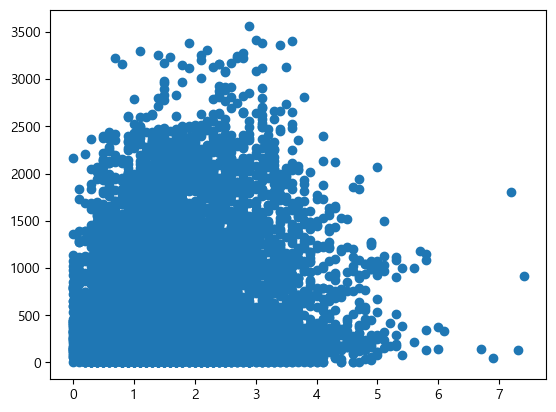

In [203]:
plt.scatter(x=data_train['Wind speed (m/s)'],y=data_train['Rented Bike Count'])

풍속 역시 큰 문제가 없어보인다.

## Visibility 

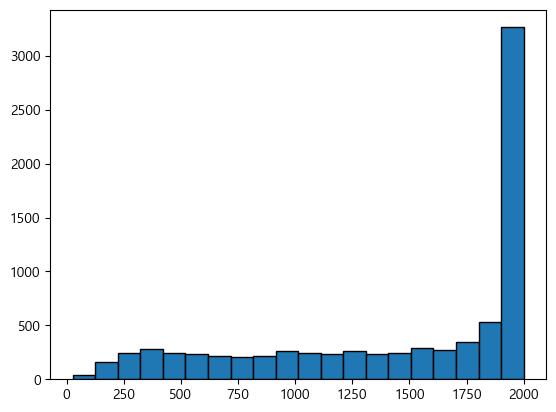

In [209]:
plt.hist(data_train['Visibility (10m)'], bins=20, edgecolor='black')
plt.show()

<Axes: ylabel='Visibility (10m)'>

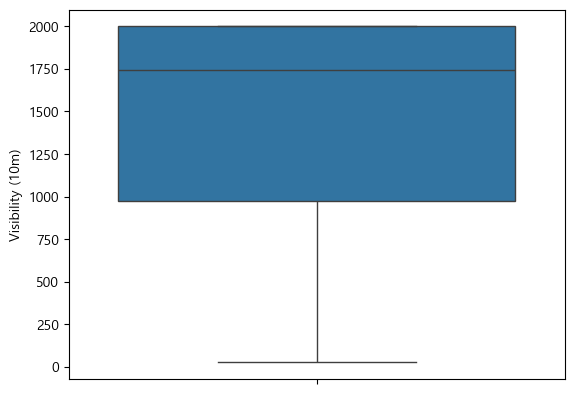

In [211]:
sns.boxplot(data_train['Visibility (10m)'])

In [210]:
(data_train['Visibility (10m)']).describe()

count    8040.000000
mean     1459.170896
std       603.716284
min        27.000000
25%       977.000000
50%      1741.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

In [212]:
np.sort((data_train['Visibility (10m)']).unique())

array([  27,   38,   53, ..., 1998, 1999, 2000], shape=(1752,))

In [214]:
(data_train['Visibility (10m)']).value_counts()

Visibility (10m)
2000    2180
1995      29
1999      27
1996      27
1992      25
        ... 
1478       1
225        1
208        1
268        1
854        1
Name: count, Length: 1752, dtype: int64

270m라는 비교적 매우 낮은 수치가 기록되어있긴 하지만, 이 역시 나올 수 있는 값으로 보아 따로 이상칭로 처리하지 않겠다.
20000m 역시 2180개로 매우 많았지만, 이 역시 가능한 수치라 생각해 이상치라 보지 않았다.

## Solar Radiation

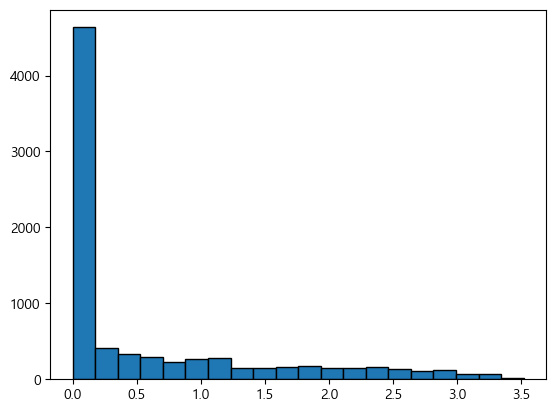

In [219]:
plt.hist(data_train['Solar Radiation (MJ/m2)'], bins=20, edgecolor='black')
plt.show()

In [220]:
(data_train['Solar Radiation (MJ/m2)']).value_counts()

Solar Radiation (MJ/m2)
0.00    3890
0.01     115
0.02      74
0.03      62
0.06      57
        ... 
3.38       1
2.97       1
3.49       1
3.35       1
3.45       1
Name: count, Length: 345, dtype: int64

In [225]:
# 0주의의 값이 상당히 많아 시간대별 일조량 0 개수 확인하겠다
(data_train[data_train['Solar Radiation (MJ/m2)'] == 0]
    .groupby('Hour')
    .size()
)

Hour
0     335
1     335
2     335
3     335
4     335
5     335
6     255
7     142
8      53
9       4
10      1
11      1
12      2
13      1
14      1
15      2
16      1
17      4
18     37
19    136
20    235
21    335
22    335
23    335
dtype: int64

겨울에 해가 금방 지는 것, 구름이 많아 태양 복사에너지가 제대로 관측되지 않는다면 0이 아예 불가능하지는 않을 것으로 보고 해당 데이터들에 이상치 처리를 따로 하지 않았다.

In [276]:
# 시간(Hour)을 기준으로 낮/밤 구분
# 일반적으로 6~19시는 낮, 그 외는 밤으로 정의
data_train['DayNight'] = np.where(
    data_train['Hour'].between(6, 19),
    'Day',
    'Night'
)

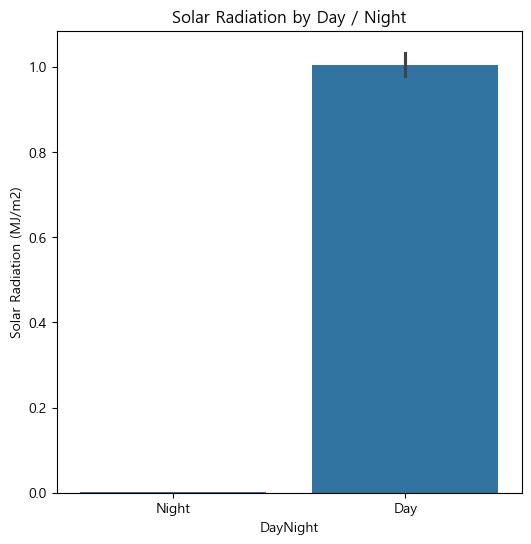

In [280]:
plt.figure(figsize=(6,6))
sns.barplot(
    x='DayNight',
    y='Solar Radiation (MJ/m2)',
    data=data_train
)
plt.title('Solar Radiation by Day / Night')
plt.show()

<Axes: xlabel='DayNight', ylabel='Solar Radiation (MJ/m2)'>

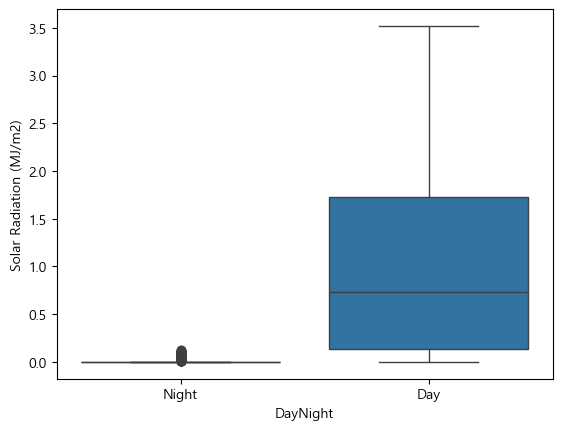

In [281]:
sns.boxplot(
    x='DayNight',
    y='Solar Radiation (MJ/m2)',
    data=data_train
)

일조량과 시간에 관계가 있을 것이라 보고 확인해본 결과 day에 일조량이 몰려 있는 것을 확인할 수 있었따.

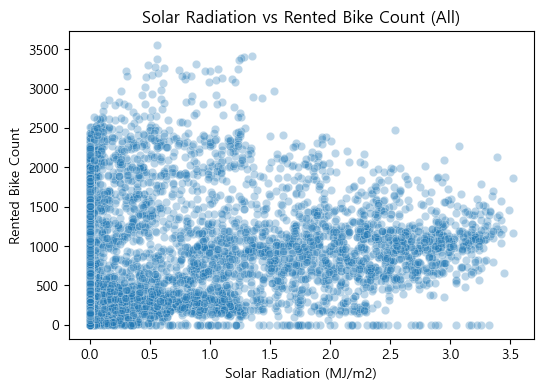

In [282]:
# 일조량 vs 대여 수 (전체)
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Solar Radiation (MJ/m2)',
    y='Rented Bike Count',
    data=data_train,
    alpha=0.3
)
plt.title('Solar Radiation vs Rented Bike Count (All)')
plt.show()

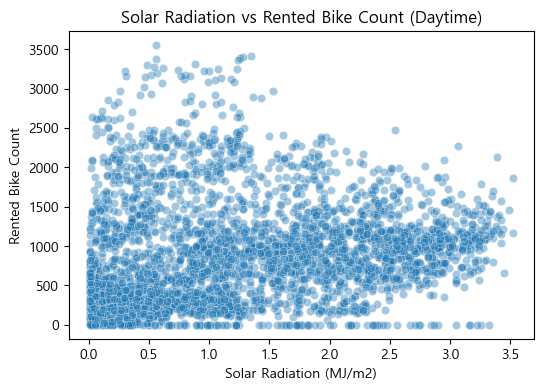

In [283]:
# 낮 시간 + 일조량 있는 경우만
solar_day = data_train[
    (data_train['Solar Radiation (MJ/m2)'] > 0) &
    (data_train['Hour'].between(6, 18))
]

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Solar Radiation (MJ/m2)',
    y='Rented Bike Count',
    data=solar_day,
    alpha=0.4
)
plt.title('Solar Radiation vs Rented Bike Count (Daytime)')
plt.show()


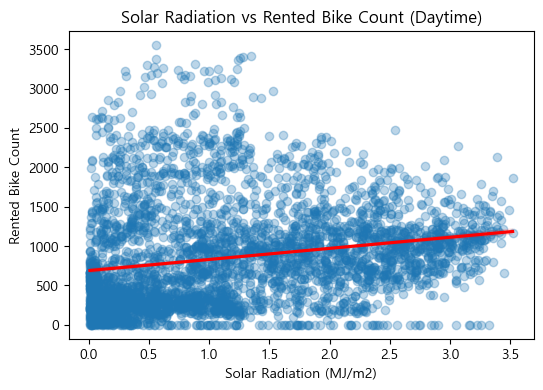

In [284]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='Solar Radiation (MJ/m2)',
    y='Rented Bike Count',
    data=solar_day,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Solar Radiation vs Rented Bike Count (Daytime)')
plt.show()

In [285]:
solar_day[['Solar Radiation (MJ/m2)', 'Rented Bike Count']].corr()

,Solar Radiation (MJ/m2),Rented Bike Count
Solar Radiation (MJ/m2),1.000000,0.202313
Rented Bike Count,0.202313,1.000000


In [ ]:
작은 양의 상관관계를 보이지만, 크게 의미 있는 수치라고 사료되지 않는다.

## Rainfall

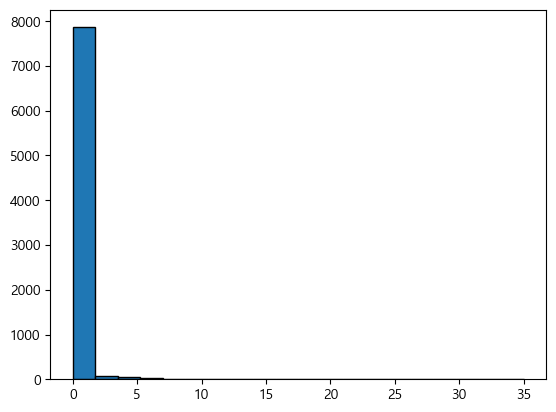

In [222]:
plt.hist(data_train['Rainfall(mm)'], bins=20, edgecolor='black')
plt.show()

In [223]:
(data_train['Rainfall(mm)']).describe()

count    8040.000000
mean        0.152164
std         1.127026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

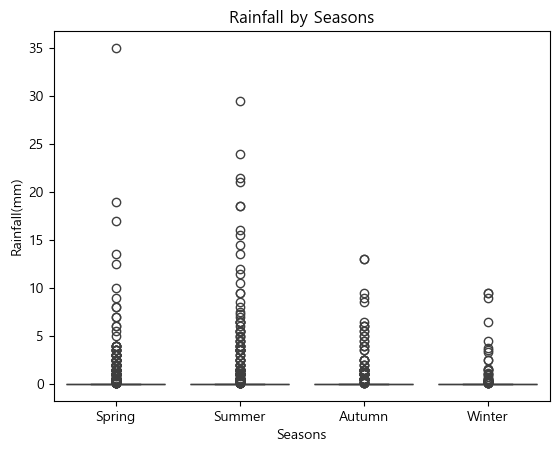

In [226]:
# 계절별 강수량 분포 확인
sns.boxplot(
    x='Seasons',
    y='Rainfall(mm)',
    data=data_train,
    order=['Spring', 'Summer', 'Autumn', 'Winter']
)
plt.title('Rainfall by Seasons')
plt.show()

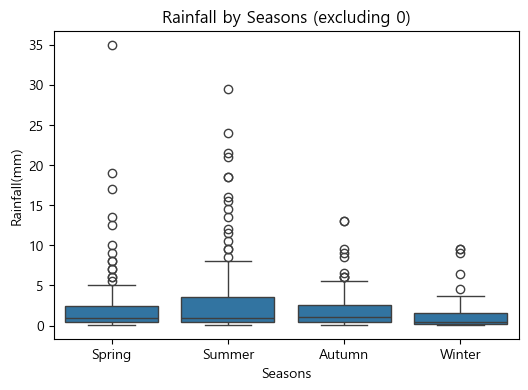

In [228]:
 # 강수량이 0보다 큰 경우만 사용해서 boxplot
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Seasons',
    y='Rainfall(mm)',
    data=data_train[data_train['Rainfall(mm)'] > 0],
    order=['Spring', 'Summer', 'Autumn', 'Winter']
)
plt.title('Rainfall by Seasons (excluding 0)')
plt.show()

0값이 너무 많아 0값을 제외하고 데이터 분포를 확인해본 결과 여름이 가장 많고 겨울이 가장 적음을 확인할 수 잇었다. 각 계절에 있는 이상치도 아예 불가능한 수치는 아니라고 판단하여 그대로 두겠다.

C:\Users\jangs\AppData\Local\Temp\ipykernel_38728\3702920801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

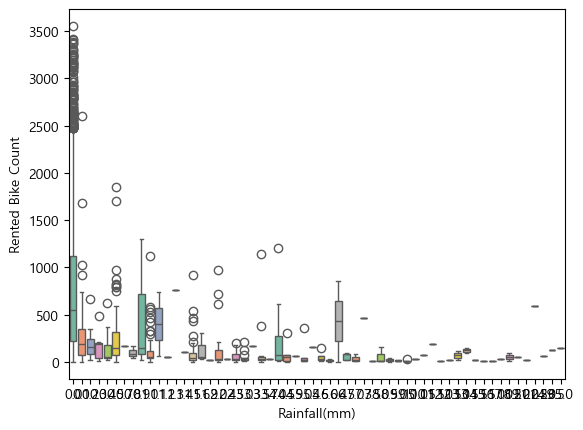

In [268]:
sns.boxplot(
    x='Rainfall(mm)',
    y='Rented Bike Count',
    data=data_train,
    palette='Set2' 
)

강수 여부에 따라 분리해보는 것이 나아보인다.

In [266]:
# 비가 왔는지 여부 (0 = 안 옴, 1 = 옴)
data_train['Rain'] = (data_train['Rainfall(mm)'] > 0).astype(int)

C:\Users\jangs\AppData\Local\Temp\ipykernel_38728\2485394029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


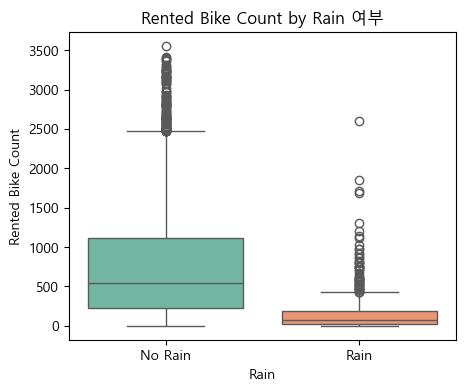

In [267]:
# 비 여부에 따른 대여 수 분포
plt.figure(figsize=(5,4))
sns.boxplot(
    x='Rain',
    y='Rented Bike Count',
    data=data_train,
    palette='Set2'
)
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.title('Rented Bike Count by Rain 여부')
plt.xlabel('Rain')
plt.ylabel('Rented Bike Count')
plt.show()

In [269]:
# 비 여부별 대여 수 요약통계량
data_train.groupby('Rain')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Rain,,,,,,,,
0,7529.0,746.725196,659.681699,0.0,220.0,546.0,1120.0,3556.0
1,511.0,165.371820,264.397759,0.0,27.0,68.0,186.0,2598.0


In [271]:
# 비가 온 날만 필터링
rain_data = data_train[data_train['Rain'] == 1]

# 앞부분 확인
rain_data.head()

,dt,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rain,Snow
51,2017-12-03 03:00:00,03/12/2017,117,3,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,1,0
54,2017-12-03 06:00:00,03/12/2017,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,1,0
57,2017-12-03 09:00:00,03/12/2017,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,1,0
78,2017-12-04 06:00:00,04/12/2017,200,6,1.2,76,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,1,0
120,2017-12-06 00:00:00,06/12/2017,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,1,1


In [275]:
# 비 온 날 중 상위 25% 대여 수
pd.set_option('display.max_rows', None)
rain_data[rain_data['Rented Bike Count'] >= 
          rain_data['Rented Bike Count'].quantile(0.75)]

,dt,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rain,Snow
78,2017-12-04 06:00:00,04/12/2017,200,6,1.2,76,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,1,0
138,2017-12-06 18:00:00,06/12/2017,204,18,1.7,90,1.0,66,0.2,0.00,0.3,0.3,Winter,No Holiday,Yes,1,1
474,2017-12-20 18:00:00,20/12/2017,329,18,-1.4,79,1.6,702,-4.5,0.00,0.1,2.2,Winter,No Holiday,Yes,1,1
477,2017-12-20 21:00:00,20/12/2017,197,21,-2.0,83,1.2,904,-4.5,0.00,0.1,2.4,Winter,No Holiday,Yes,1,1
1089,2018-01-15 09:00:00,15/01/2018,303,9,3.9,86,1.7,399,1.7,0.11,0.2,0.0,Winter,No Holiday,Yes,1,0
2508,2018-03-15 12:00:00,15/03/2018,204,12,13.3,97,2.9,771,12.8,0.19,2.0,0.0,Spring,No Holiday,Yes,1,0
2601,2018-03-19 09:00:00,19/03/2018,387,9,8.2,81,2.7,1273,5.1,0.20,0.5,0.0,Spring,No Holiday,Yes,1,0
2661,2018-03-21 21:00:00,21/03/2018,231,21,1.2,92,0.7,1474,0.0,0.00,0.5,0.0,Spring,No Holiday,Yes,1,0
2976,2018-04-04 00:00:00,04/04/2018,355,0,15.0,96,2.1,141,14.3,0.00,0.1,0.0,Spring,No Holiday,Yes,1,0
3008,2018-04-05 08:00:00,05/04/2018,207,8,6.7,94,2.7,1127,5.7,0.05,2.0,0.0,Spring,No Holiday,Yes,1,0


이상치들을 살펴보았을 때, 두번을 제외하고는 비가 온 날 모두 강수량이 비교적 적음을 확인할 수 있었다. 이상치를 포함하더라도 비가 오지 않은 날이 온 날에 비해 이용량이 현저히 높음을 확인할 수 있다.

## Snowfall

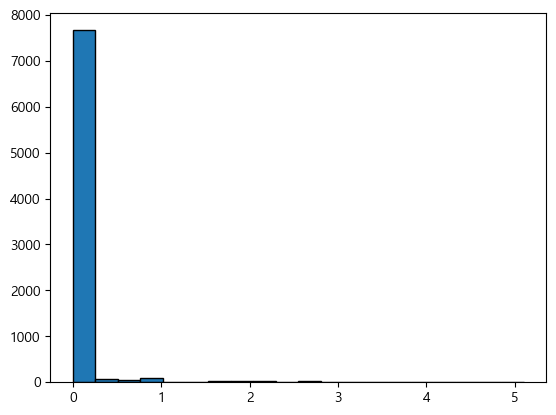

In [229]:
plt.hist(data_train['Snowfall (cm)'], bins=20, edgecolor='black')
plt.show()

In [230]:
(data_train['Snowfall (cm)']).describe()

count    8040.000000
mean        0.066493
std         0.378182
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.100000
Name: Snowfall (cm), dtype: float64

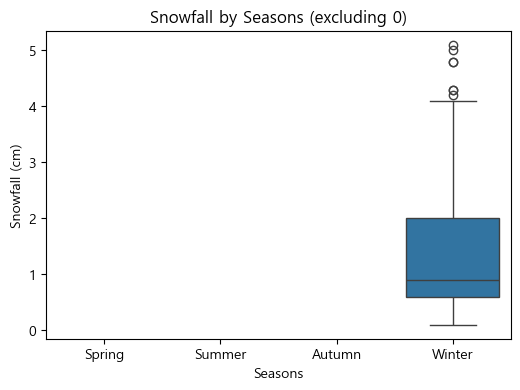

In [231]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Seasons',
    y='Snowfall (cm)',
    data=data_train[data_train['Snowfall (cm)'] > 0],
    order=['Spring', 'Summer', 'Autumn', 'Winter']
)
plt.title('Snowfall by Seasons (excluding 0)')
plt.show()

강수량과 유사하게 0인 데이터를 제외하고 그래프를 그려본 결과 겨울에 값이 몰려있음을 볼 수 있었고, 이상치 역시 크게 벗어나는 범위는 존재하지 않는다고 생각하여 이상치라고 보지 않겠다.

C:\Users\jangs\AppData\Local\Temp\ipykernel_38728\3651560509.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

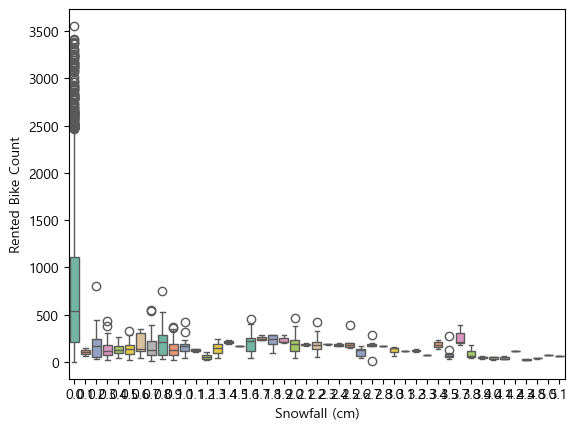

In [261]:
sns.boxplot(
    x='Snowfall (cm)',
    y='Rented Bike Count',
    data=data_train,
    palette='Set2' 
)

역시 적설 여부에 따라 나눠보는 편이 나아보인다.

In [264]:
# 눈이 왔는지 여부 (0 = 안 옴, 1 = 옴)
data_train['Snow'] = (data_train['Snowfall (cm)'] > 0).astype(int)

C:\Users\jangs\AppData\Local\Temp\ipykernel_38728\2108911357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


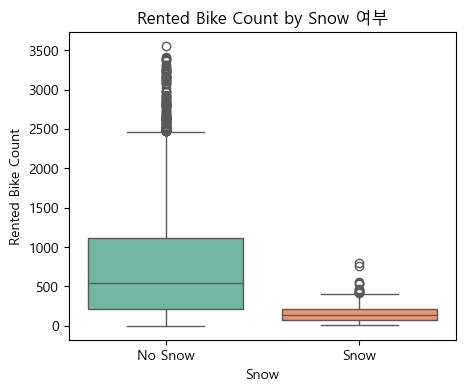

In [265]:
# 눈 여부에 따른 대여 수 분포
plt.figure(figsize=(5,4))
sns.boxplot(
    x='Snow',
    y='Rented Bike Count',
    data=data_train,
    palette='Set2'
)
plt.xticks([0, 1], ['No Snow', 'Snow'])
plt.title('Rented Bike Count by Snow 여부')
plt.xlabel('Snow')
plt.ylabel('Rented Bike Count')
plt.show()

In [ ]:
눈이 오지 않은 날이 눈이 온 날에 비해 매우 높은 이용량을 보이고 있음을 알 수 있다. 

## Seasons

C:\Users\jangs\AppData\Local\Temp\ipykernel_38728\122049512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


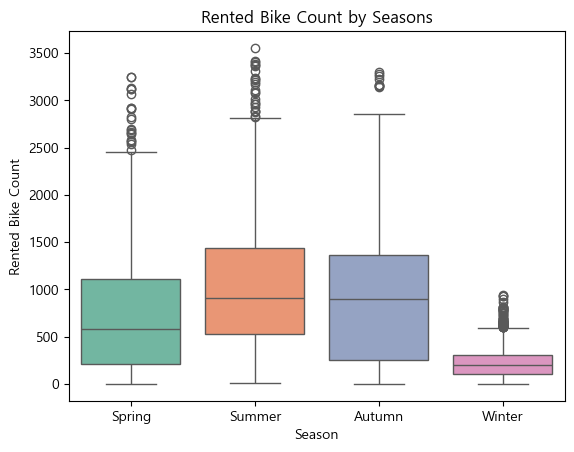

In [257]:
# 계절별 자전거 대여 수 분포
sns.boxplot(
    x='Seasons',
    y='Rented Bike Count',
    data=data_train,
    order=['Spring', 'Summer', 'Autumn', 'Winter'],
    palette='Set2' 
)
plt.title('Rented Bike Count by Seasons')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.show()

# 자전거 대여수와의 관계 파악
- 앞서 살펴본 히트맵에서 의미있다고 생각된 변수 위주로 관찰하겠다

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

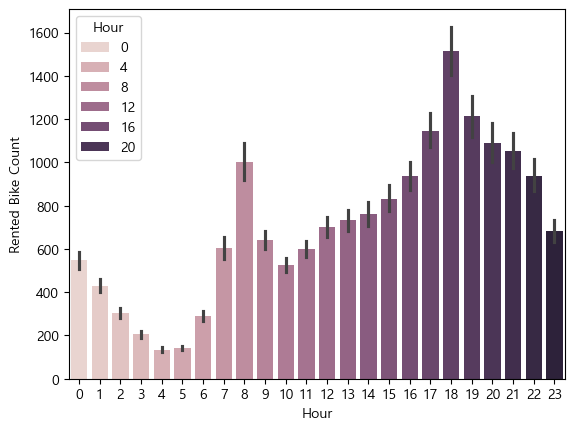

In [241]:
sns.barplot(data=data_train, x ='Hour', y='Rented Bike Count', hue='Hour')

출근 시간인 8시, 퇴근 시간 6시 전후로 이용량이 많은 것을 확인할 수 있었다. 평일과 주말을 나눠서 본다면 차이가 더욱 극대화될 것으로 보인다.

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

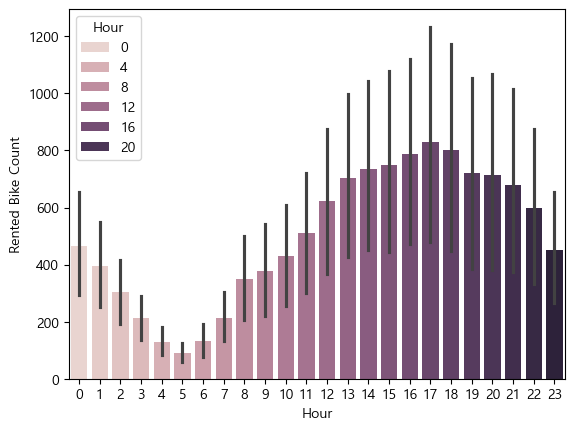

In [245]:
sns.barplot(data=data_train[data_train['Holiday'] == 'Holiday'], x='Hour', y='Rented Bike Count',hue='Hour')

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

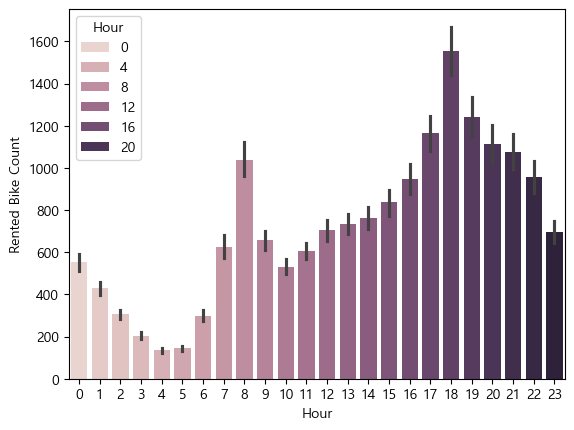

In [247]:
sns.barplot(data=data_train[data_train['Holiday'] == 'No Holiday'], x='Hour', y='Rented Bike Count',hue='Hour')

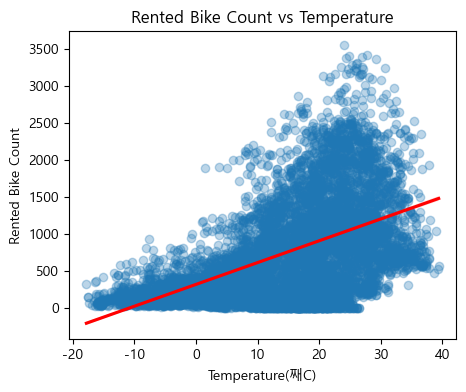

In [233]:
# 기온과 대여 수의 관계
plt.figure(figsize=(5,4))
sns.regplot(
    x='Temperature(째C)',
    y='Rented Bike Count',
    data=data_train,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Rented Bike Count vs Temperature')
plt.show()

<Axes: xlabel='Temperature(째C)', ylabel='Rented Bike Count'>

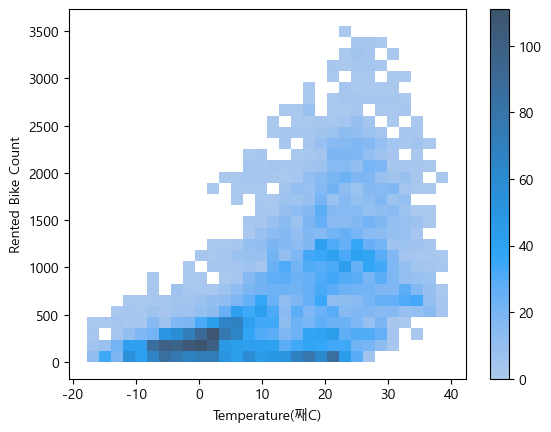

In [236]:
# 산점도 점이 너무 많아서 겹칠 때
sns.histplot(
    data=data_train,
    x='Temperature(째C)',
    y='Rented Bike Count',
    bins=30,        # 구간 수
    cbar=True       # 색상바(빈도) 표시
)

기온과 이용량에서 양의 상관관계가 있는 것을 볼 수 있었고, 15도에서 25도 정도의 기온에 이용량이 많은 것을 확인할 수 있었다.

<Axes: xlabel='Dew point temperature(째C)', ylabel='Rented Bike Count'>

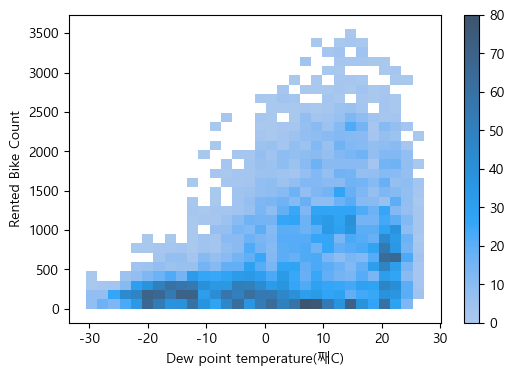

In [248]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=data_train,
    x='Dew point temperature(째C)',
    y='Rented Bike Count',
    bins=30,
    cbar=True
)

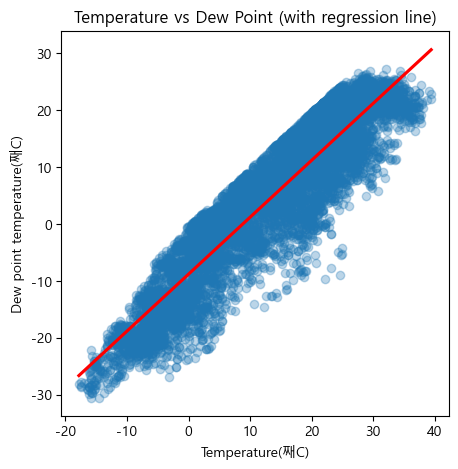

In [249]:
# 기온-이슬점 관계 + 회귀직선
plt.figure(figsize=(5,5))
sns.regplot(
    x='Temperature(째C)',
    y='Dew point temperature(째C)',
    data=data_train,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Temperature vs Dew Point (with regression line)')
plt.show()

In [250]:
# 기온과 이슬점 상관계수
data_train[['Temperature(째C)', 'Dew point temperature(째C)']].corr()

,Temperature(째C),Dew point temperature(째C)
Temperature(째C),1.000000,0.918286
Dew point temperature(째C),0.918286,1.000000


기온과 이슬점은 매우 강한 양의 상관관계를 가지고 있음을 확인할 수 있었다.

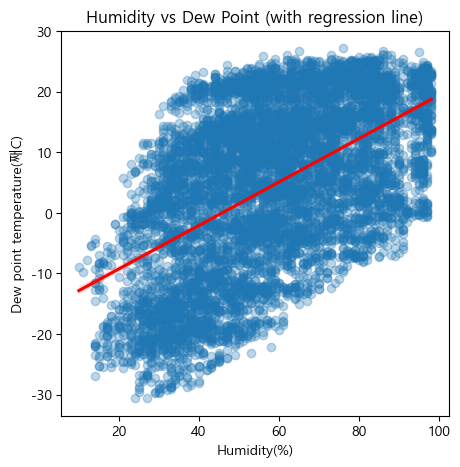

In [254]:
# 습도-이슬점 관계 + 회귀직선
plt.figure(figsize=(5,5))
sns.regplot(
    x='Humidity(%)',
    y='Dew point temperature(째C)',
    data=data_train,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Humidity vs Dew Point (with regression line)')
plt.show()

대략적인 변수들의 관계를 파악해보았으니 이제 모델링를 진행해보겠다.

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [293]:
# 타깃 변수
y = data_train['Rented Bike Count']

# 설명 변수 (숫자형 위주, 지금까지 분석한 것들)
X = data_train[
    [
        'Hour',
        'Temperature(째C)',
        'Humidity(%)',
        'Wind speed (m/s)',
        'Solar Radiation (MJ/m2)',
        'Rainfall(mm)',
        'Snowfall (cm)'
    ]
]

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## LinearRegression

In [297]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# validation 예측
val_pred_lr = lr.predict(X_val)

# 평가
rmse_lr = np.sqrt(mean_squared_error(y_val, val_pred_lr))
r2_lr = r2_score(y_val, val_pred_lr)

rmse_lr, r2_lr

(np.float64(466.4339986173711), 0.5040752453801545)

## RandomForestRegressor

In [301]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

val_pred_rf = rf.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, val_pred_rf))
r2_rf = r2_score(y_val, val_pred_rf)

rmse_rf, r2_rf

(np.float64(295.0835934186209), 0.801515994147282)

## DecisionTreeRegressor

In [303]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,        # 깊이 제한(과적합 완화)
    random_state=42
)

dt.fit(X_train, y_train)
val_pred_dt = dt.predict(X_val)

rmse_dt = np.sqrt(mean_squared_error(y_val, val_pred_dt))
r2_dt = r2_score(y_val, val_pred_dt)

rmse_dt, r2_dt

(np.float64(366.4396362292616), 0.6939162481823762)

## GradientBoostingRegressor

In [306]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,      # 트리 개수
    learning_rate=0.05,    # 학습률 (작을수록 안정적)
    max_depth=3,           # 트리 깊이
    random_state=42
)

gbr.fit(X_train, y_train)

# validation 예측
val_pred_gbr = gbr.predict(X_val)

# 평가
rmse_gbr = np.sqrt(mean_squared_error(y_val, val_pred_gbr))
r2_gbr = r2_score(y_val, val_pred_gbr)

rmse_gbr, r2_gbr

(np.float64(302.0440881359256), 0.792041790792704)

## +) SVR

In [302]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svr = Pipeline([
    ('scaler', StandardScaler()),   # SVR은 스케일링 필수
    ('svr', SVR(kernel='rbf', C=10, epsilon=0.1))
])

svr.fit(X_train, y_train)

val_pred_svr = svr.predict(X_val)

rmse_svr = np.sqrt(mean_squared_error(y_val, val_pred_svr))
r2_svr = r2_score(y_val, val_pred_svr)

rmse_svr, r2_svr

(np.float64(405.89652837557884), 0.6244514728795706)

## +) HistGradientBoostingRegressor

In [305]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=8,
    random_state=42
)

hgb.fit(X_train, y_train)
val_pred_hgb = hgb.predict(X_val)

rmse_hgb = np.sqrt(mean_squared_error(y_val, val_pred_hgb))
r2_hgb = r2_score(y_val, val_pred_hgb)

rmse_hgb, r2_hgb


(np.float64(291.0305075120508), 0.8069310553331651)

선택 이유: 여러 회귀 모델을 비교한 결과, HistGradientBoostingRegressor가 가장 높은 R**2와 가장 낮은 RMSE를 기록하여 최종 모델로 선정하였다.

모델 특징:
- 히스토그램 기반 Gradient Boosting 회귀 모델
- 비선형 관계 학습에 강함
- 스케일링 불필요
- 대용량 데이터에서 빠른 학습 속도
- 범주형 데이터를 별도의 원-핫 인코딩 없이도 직접 처리 가능

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# permutation importance 계산
result = permutation_importance(
    hgb,              # 학습된 모델
    X,                # train feature
    y,                # train target
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# 결과 정리
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

importance_df

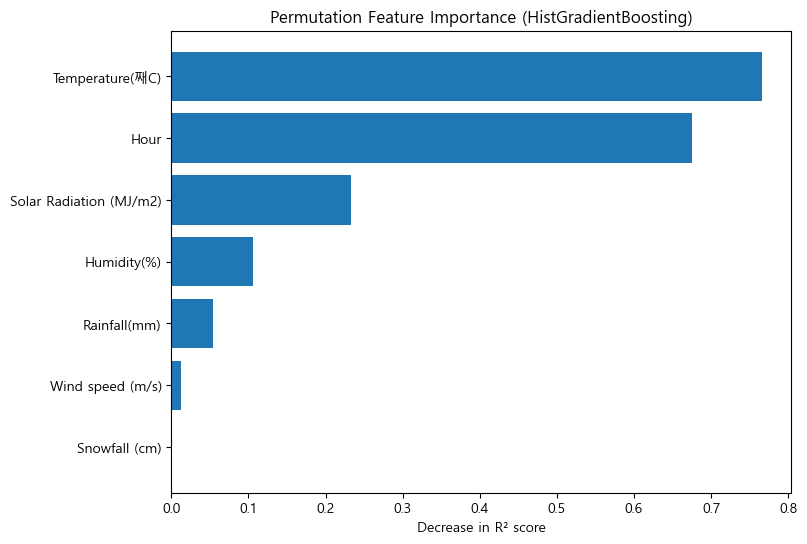

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(
    importance_df['feature'],
    importance_df['importance_mean']
)
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance (HistGradientBoosting)')
plt.xlabel('Decrease in R² score')
plt.show()

변수 중요도 분석 결과, 기온과 시간대, 일조량이 핵심 변수임을 확인하였다.

In [310]:
# 최종 모델 재학습
final_model = HistGradientBoostingRegressor(
    max_depth=6,
    learning_rate=0.1,
    max_iter=300,
    random_state=42
)

final_model.fit(X, y)

,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,300
,max_leaf_nodes,31
,max_depth,6
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [311]:
X_test = data_test[X.columns]  # train과 동일한 컬럼만 사용

In [312]:
test_pred = final_model.predict(X_test)

In [313]:
data_test_result = data_test.copy()
data_test_result['Rented Bike Count'] = test_pred

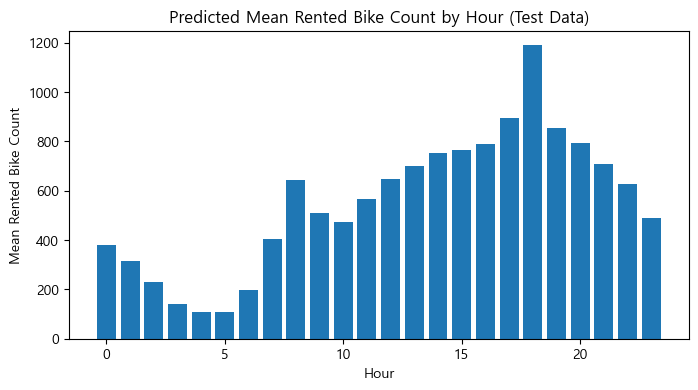

In [317]:
hour_mean = data_test_result.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(8,4))
plt.bar(
    hour_mean.index,   # x축: Hour
    hour_mean.values   # y축: 평균 대여 수
)
plt.xlabel('Hour')
plt.ylabel('Mean Rented Bike Count')
plt.title('Predicted Mean Rented Bike Count by Hour (Test Data)')
plt.show()

In [319]:
data_test_result.to_csv('bike_test_predition_full.csv', index=False)